<a href="https://colab.research.google.com/github/girotodenis/ReconhecimentoImagemVisaoComputacional/blob/master/Projeto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NOME COMPLETO DOS INTEGRANTES DO GRUPO:
**Davi Miranda Gonçalves**, 
**Denis SIlva Giroto**,
**Naiara Moura Pires**

MATRÍCULAS DOS INTEGRANTES DO GRUPO:
**1931143030**,
**1931143029**,
**1931143033**

In [1]:
!git clone -l -s https://github.com/girotodenis/ReconhecimentoImagemVisaoComputacional.git projeto
#%cd cloned-repo
!ls

Cloning into 'projeto'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 193 (delta 2), reused 0 (delta 0), pack-reused 184
Receiving objects: 100% (193/193), 90.14 MiB | 36.67 MiB/s, done.
Resolving deltas: 100% (81/81), done.
projeto  sample_data


In [2]:
from google.colab.patches import cv2_imshow

import numpy as np
import cv2
import imutils


In [3]:
net = cv2.dnn.readNet('./projeto/yolov3-tiny.weights','./projeto/yolov3-tiny.cfg')

In [4]:
classes = []
with open('./projeto/coco.names','r')as f:
  classes = [line.strip() for line in f.readlines()]
print(classes)

layer_names = net.getLayerNames()
outputLayers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
print(outputLayers)

cores = np.random.uniform(0,255,size=(len(classes), 3))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
['yolo_16', 'yolo_23']


In [5]:
def calcula_box(detection, width, height):
  center_x = int(detection[0]*width)
  center_y = int(detection[1]*height)
  w = int(detection[2]*width)
  h = int(detection[3]*height)
  x = int(center_x - w/2)
  y = int(center_y - h/2)
  return [x,y,w,h]

In [6]:
def desenha_box(frame, boxes, class_ids, confidences):
  for i in range(len(boxes)):
    x,y,w,h = boxes[i]
    label = str(classes[class_ids[i]])
    label += ' '+ str(round(confidences[i],2))
    cor = cores[class_ids[i]]
    cv2.rectangle(frame,(x ,y),(x+w, y+h),cor, 2)
    cv2.putText(frame, label, (x, y+30), cv2.FONT_HERSHEY_PLAIN,1,(255,255,255),2)



1280 720


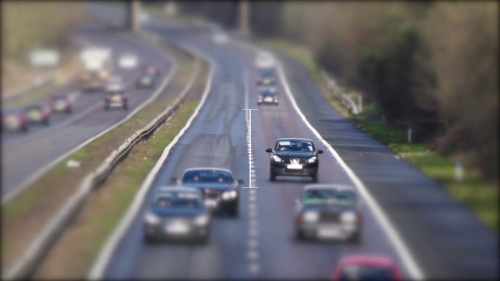

500 [] [] []


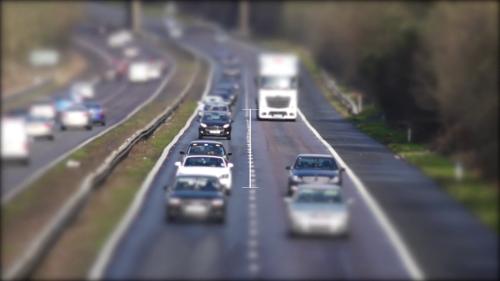

1000 [[775, 430, 84, 50]] [0.56519055] [2]


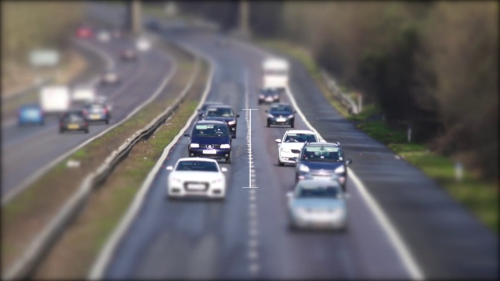

1500 [[519, 325, 42, 34], [450, 439, 102, 46]] [0.54151404, 0.7982349] [2, 2]


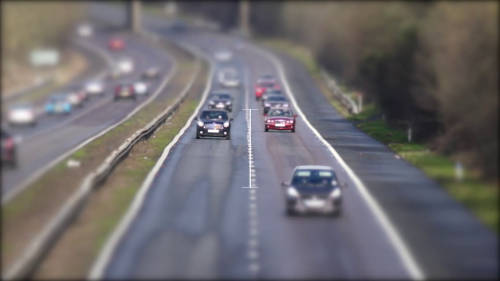

2000 [[768, 457, 96, 60]] [0.8843447] [2]


KeyboardInterrupt: ignored

In [7]:
cap = cv2.VideoCapture('./projeto/videos/Car2166.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
writer = cv2.VideoWriter('./projeto/videos/carros2165_novo.mp4', cv2.VideoWriter_fourcc(*'DIVX'),20,(width, height))

print(width, height)
if cap.isOpened() == False:
    print('error file not found')

cod_frame=0
while cap.isOpened():
    cod_frame+=1
    ret, frame = cap.read()
    
    if ret == True:

        cv2.line(frame,(620 ,280),(660, 280),(255,255,255), 1)
        cv2.line(frame,(620 ,480),(660, 480),(255,255,255), 1)
        cv2.line(frame,(640 ,280),(640, 480),(255,255,255), 2)

        #BGR -> RGB
        blob = cv2.dnn.blobFromImage(frame, 0.00392,(320,320),(0,0,0),True)
        net.setInput(blob)
        outs = net.forward(outputLayers)

        class_ids = []
        confidences = []
        boxes = []

        for out in outs:
          for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            
            if confidence>0.5:
              x,y,w,h = calcula_box(detection,width,height)
              
              if y>280 and y<480 :
                boxes.append([x,y,w,h])
                confidences.append(confidence)
                class_ids.append(class_id)

        if cod_frame % 500 == 0:
          nome_foto = 'foto_'+str(cod_frame)+'.png'
          cv2.imwrite(nome_foto, imutils.resize(frame, width=500))
          cv2_imshow(cv2.imread(nome_foto))
          print(cod_frame, boxes, confidences, class_ids)

        desenha_box(frame, boxes, class_ids, confidences)

        writer.write(frame)
    else:
        break
        
cap.release()
writer.release()

In [ ]:
x = [[1]]
x[0][0]